<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/predvalu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [199]:
df = pd.read_csv("/content/spi3lagged.csv")
df

,date,maxtemp,rh,soil.moisture,root soil wetness,surface soil wetness,sl1,sl2,spi3
0,01-03-1981,32.041786,62.846786,0.354643,0.453929,0.453214,-0.948040,-0.771554,-0.609626
1,01-04-1981,33.429355,62.240000,0.238065,0.415161,0.417097,-0.609626,-0.948040,-0.237465
2,01-05-1981,32.831333,69.870333,0.292667,0.416333,0.414333,-0.237465,-0.609626,0.035132
3,01-06-1981,30.221613,77.254839,0.502258,0.505161,0.494194,0.035132,-0.237465,1.642811
4,01-07-1981,27.278000,86.731000,0.925000,0.900667,0.875667,1.642811,0.035132,1.162105
...,...,...,...,...,...,...,...,...,...
485,01-08-2021,27.359032,89.194839,0.959355,0.975161,0.961613,1.277979,0.848941,0.710179
486,01-09-2021,27.448710,88.669355,0.934194,0.960000,0.939355,0.710179,1.277979,0.685178
487,01-10-2021,27.761667,88.440000,0.935333,0.959333,0.940000,0.685178,0.710179,0.800410
488,01-11-2021,28.322581,86.146774,0.939355,0.960968,0.943226,0.800410,0.685178,0.550892


In [200]:
del df["date"]

In [201]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [202]:
# Scaling the entire dataset

dataset = df
values = dataset.values

#values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df[["maxtemp"	,"rh"	,"soil.moisture"	,"root soil wetness"	,"surface soil wetness"	,"sl1"	,"sl2",	"spi3"]])
print(scaled.shape)

(490, 8)


In [203]:
tf = pd.DataFrame(scaled, columns = ["maxtemp"	,"rh",	"soil.moisture",	"root soil wetness",	"surface soil wetness",	"sl1",	"sl2",	"spi1"])
tf

,maxtemp,rh,soil.moisture,root soil wetness,surface soil wetness,sl1,sl2,spi1
0,0.768310,0.160905,0.218374,0.102063,0.094036,0.121434,0.175201,0.224534
1,0.949373,0.143131,0.073708,0.037476,0.032524,0.224534,0.121434,0.337915
2,0.871338,0.366635,0.141466,0.039429,0.027817,0.337915,0.224534,0.420964
3,0.530797,0.582937,0.401553,0.187417,0.163828,0.420964,0.337915,0.910755
4,0.146687,0.860508,0.926145,0.846333,0.813519,0.910755,0.420964,0.764304
...,...,...,...,...,...,...,...,...
485,0.157261,0.932677,0.968777,0.970442,0.959895,0.799606,0.668897,0.626622
486,0.168963,0.917285,0.937553,0.945183,0.921987,0.626622,0.799606,0.619005
487,0.209800,0.910567,0.938968,0.944072,0.923085,0.619005,0.626622,0.654111
488,0.282993,0.843395,0.943958,0.946795,0.928579,0.654111,0.619005,0.578094


In [204]:
values = tf.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 390

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(390, 1, 7) (390,) (100, 1, 7) (100,)


In [205]:
train.shape, test.shape, values.shape

((390, 8), (100, 8), (490, 8))

In [206]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization,GRU
from tensorflow.keras.models import Sequential

In [207]:
model = Sequential()
model.add(LSTM(1000, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.8))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()
# fit network
history = model.fit(train_X, train_y, epochs=70, batch_size=25, validation_split=0.2, verbose=2, shuffle=False)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1000)              4032000   
                                                                 
 dropout_8 (Dropout)         (None, 1000)              0         
                                                                 
 dense_8 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4,033,001
Trainable params: 4,033,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
13/13 - 3s - loss: 0.0972 - val_loss: 0.0558 - 3s/epoch - 229ms/step
Epoch 2/70
13/13 - 1s - loss: 0.0481 - val_loss: 0.0492 - 552ms/epoch - 42ms/step
Epoch 3/70
13/13 - 1s - loss: 0.0425 - val_loss: 0.0479 - 572ms/epoch - 44ms/step
Epoch 4/70
13/13 - 1s - loss: 0.0385 - val_loss: 0.0415 - 542ms/

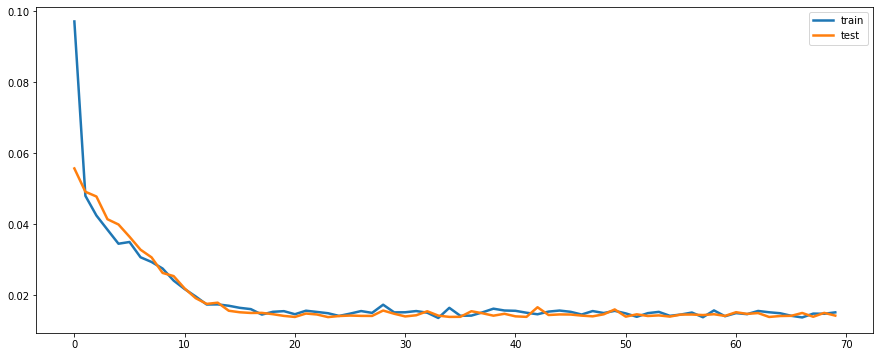

In [208]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

In [247]:
test_X.shape

(100, 1, 7)

In [248]:
testPredict = model.predict(test_X)
print(testPredict.shape)
testPredict = testPredict.ravel()

print(testPredict.shape)

(100, 1)
(100,)


In [249]:
y_test_true = test[:,7]

In [244]:
#poll = np.array(df['spi3'])
#print(poll.shape)
#meanop = poll.mean()
#stdop = poll.std()
#print(testPredict.shape)
#y_test_true = y_test_true*stdop + meanop
#testPredict = testPredict*stdop + meanop

#testPredict.shape

(490,)
(100, 1)


(100, 1)

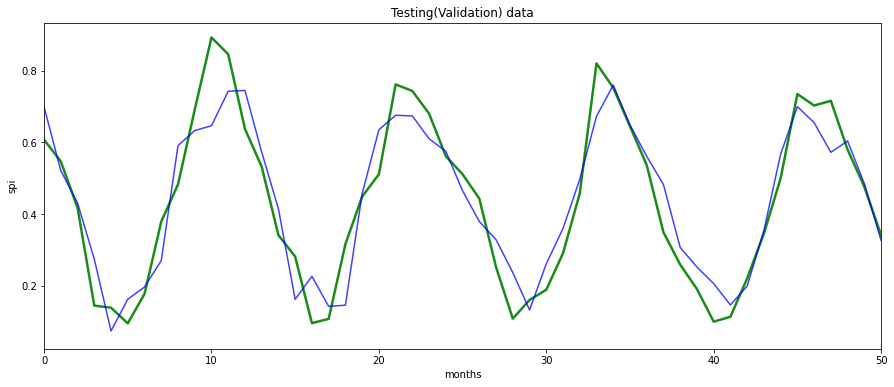

(100,)


In [250]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.xlim([0,50])
plt.ylabel("spi")
plt.xlabel("months")

plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()
#testPredict=testPredict.reshape(-1,1)
print(testPredict.shape)
#testTrue = scaler.inverse_transform(testPredict)

In [251]:
from sklearn.metrics import r2_score
r=r2_score(y_test_true, testPredict)
print("r2socre ="  ,r)
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

r2socre = 0.8361069490018309
Test(Validation) RMSE = 0.09406010944439352


In [239]:
testPredict

array([0.6992748 , 0.5209222 , 0.4307278 , 0.27358395, 0.07294832,
       0.16175279, 0.19601008, 0.26958   , 0.5911315 , 0.6330293 ,
       0.64661753, 0.74291354, 0.74526423, 0.5728919 , 0.41432062,
       0.16140829, 0.22588868, 0.1416619 , 0.14509913, 0.45637646,
       0.63530236, 0.6758479 , 0.6739902 , 0.61018056, 0.57496727,
       0.46482673, 0.37900695, 0.32807714, 0.23640227, 0.1316702 ,
       0.26077253, 0.35944873, 0.49691132, 0.673132  , 0.7601523 ,
       0.648933  , 0.561107  , 0.48214868, 0.3063387 , 0.25172508,
       0.20534688, 0.14568953, 0.19826785, 0.35376534, 0.5673335 ,
       0.69992274, 0.6551878 , 0.57229894, 0.60410374, 0.48475847,
       0.32606116, 0.24072331, 0.14484012, 0.19080542, 0.16214561,
       0.37621555, 0.59753704, 0.7579132 , 0.58174103, 0.62833494,
       0.6209306 , 0.41728216, 0.29003388, 0.27286926, 0.27380088,
       0.08906142, 0.18237539, 0.30741116, 0.5603738 , 0.6384123 ,
       0.7034939 , 0.625775  , 0.6866465 , 0.57492954, 0.52302

In [252]:
gf = pd.DataFrame(testPredict) 
gf

,0
0,0.699275
1,0.520922
2,0.430728
3,0.273584
4,0.072948
...,...
95,0.650601
96,0.551868
97,0.495230
98,0.491390


In [253]:
sf = pd.read_csv("/content/TEST3.csv")

#values = sf.values

#values = values.astype('float32')


sf
scaler = MinMaxScaler(feature_range=(0, 1))
sf = scaler.fit_transform(sf)
sf=pd.DataFrame(sf)
print(sf)
sf[7]=gf
sf


           0         1         2         3         4         5         6  \
0   0.034210  0.963881  0.981029  0.984950  0.978458  0.823013  1.000000   
1   0.053234  0.923916  0.937830  0.942178  0.912075  0.654991  0.729130   
2   0.155279  0.830562  0.904722  0.883501  0.849206  0.581840  0.580274   
3   0.350767  0.553080  0.828485  0.750372  0.709392  0.425586  0.515468   
4   0.342607  0.284592  0.615936  0.449833  0.421202  0.095582  0.377039   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.090537  0.949103  0.982293  0.981048  0.969388  0.886936  0.646021   
96  0.103320  0.931858  0.949410  0.954849  0.930272  0.678188  0.785761   
97  0.147930  0.924332  0.950899  0.953698  0.931406  0.668996  0.600825   
98  0.227884  0.849076  0.956155  0.956522  0.937075  0.711361  0.592682   
99  0.195634  0.818926  0.949592  0.953698  0.934921  0.619627  0.630214   

           7  
0   0.654991  
1   0.581840  
2   0.425586  
3   0.095582  
4   0.088519

,0,1,2,3,4,5,6,7
0,0.034210,0.963881,0.981029,0.984950,0.978458,0.823013,1.000000,0.699275
1,0.053234,0.923916,0.937830,0.942178,0.912075,0.654991,0.729130,0.520922
2,0.155279,0.830562,0.904722,0.883501,0.849206,0.581840,0.580274,0.430728
3,0.350767,0.553080,0.828485,0.750372,0.709392,0.425586,0.515468,0.273584
4,0.342607,0.284592,0.615936,0.449833,0.421202,0.095582,0.377039,0.072948
...,...,...,...,...,...,...,...,...
95,0.090537,0.949103,0.982293,0.981048,0.969388,0.886936,0.646021,0.650601
96,0.103320,0.931858,0.949410,0.954849,0.930272,0.678188,0.785761,0.551868
97,0.147930,0.924332,0.950899,0.953698,0.931406,0.668996,0.600825,0.495230
98,0.227884,0.849076,0.956155,0.956522,0.937075,0.711361,0.592682,0.491390


In [254]:
testPredict=testPredict.reshape(-1,1)
testTrue = scaler.inverse_transform(sf)
testTrue

array([[ 2.69638710e+01,  8.96451613e+01,  9.58387097e-01,
         9.77419355e-01,  9.66774194e-01,  1.10410736e+00,
         1.93574799e+00,  7.67536373e-01],
       [ 2.70973333e+01,  8.84273333e+01,  9.25333333e-01,
         9.52666667e-01,  9.29000000e-01,  6.47082791e-01,
         1.10410736e+00,  2.82413020e-01],
       [ 2.78132258e+01,  8.55825806e+01,  9.00000000e-01,
         9.18709677e-01,  8.93225806e-01,  4.48111197e-01,
         6.47082791e-01,  3.70821490e-02],
       [ 2.91846667e+01,  7.71270000e+01,  8.41666667e-01,
         8.41666667e-01,  8.13666667e-01,  2.30970850e-02,
         4.48111197e-01, -3.90352939e-01],
       [ 2.91274194e+01,  6.89454839e+01,  6.79032258e-01,
         6.67741935e-01,  6.49677419e-01, -8.74522771e-01,
         2.30970850e-02, -9.36086678e-01],
       [ 3.07235484e+01,  6.74106452e+01,  4.66129032e-01,
         5.08064516e-01,  5.04838710e-01, -8.93733343e-01,
        -8.74522771e-01, -6.94536384e-01],
       [ 3.16042857e+01,  6.564857

In [255]:
gf = pd.DataFrame(testTrue)
gf 

,0,1,2,3,4,5,6,7
0,26.963871,89.645161,0.958387,0.977419,0.966774,1.104107,1.935748,0.767536
1,27.097333,88.427333,0.925333,0.952667,0.929000,0.647083,1.104107,0.282413
2,27.813226,85.582581,0.900000,0.918710,0.893226,0.448111,0.647083,0.037082
3,29.184667,77.127000,0.841667,0.841667,0.813667,0.023097,0.448111,-0.390353
4,29.127419,68.945484,0.679032,0.667742,0.649677,-0.874523,0.023097,-0.936087
...,...,...,...,...,...,...,...,...
95,27.359032,89.194839,0.959355,0.975161,0.961613,1.277979,0.848941,0.635142
96,27.448710,88.669355,0.934194,0.960000,0.939355,0.710179,1.277979,0.366587
97,27.761667,88.440000,0.935333,0.959333,0.940000,0.685178,0.710179,0.212530
98,28.322581,86.146774,0.939355,0.960968,0.943226,0.800410,0.685178,0.202084
